[*********************100%***********************]  4 of 4 completed


Maximum Drawdown: -22.14%


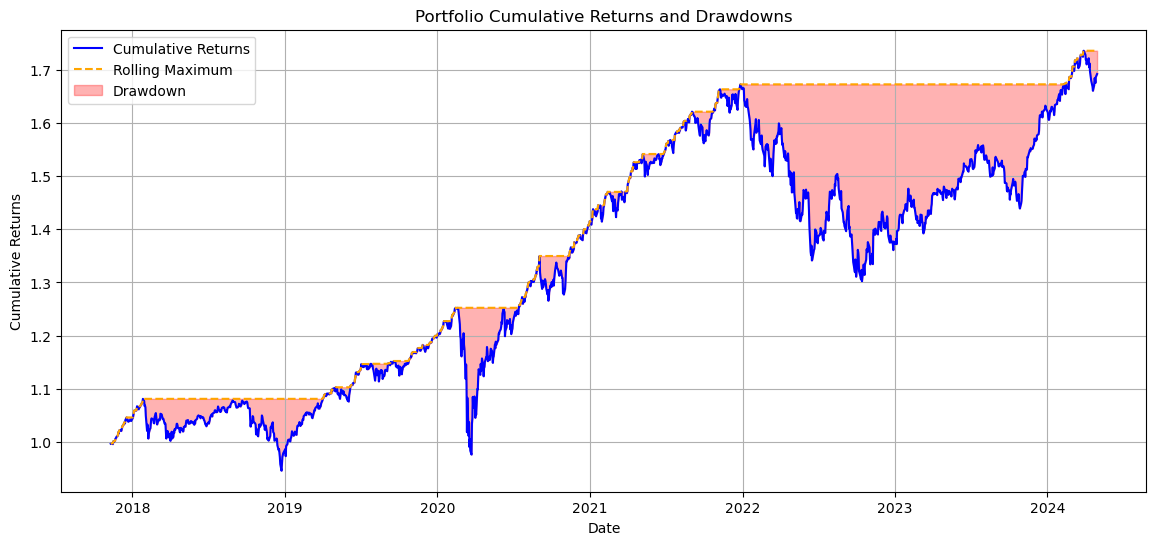


Portfolio Daily VaR (as percentage):
Historical VaR at 95%: -1.17%
Historical VaR at 99%: -2.19%
Parametric VaR at 95%: -1.30%
Parametric VaR at 99%: -1.88%
Monte Carlo VaR at 95%: -1.30%
Monte Carlo VaR at 99%: -1.82%


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Collection
assets = ['BTC-USD', 'ETH-USD', '^GSPC', 'AGG']  # Cryptos, S&P 500, Bonds
data = yf.download(assets, start='2015-09-01', end='2024-04-30')['Adj Close']

# Step 2: Align Trading Days
data = data.dropna()  # Drop rows with missing values to align trading days

# Step 3: Calculate Returns
returns = data.pct_change().dropna()

# Step 4: Portfolio Weights
# Define weights for traditional portfolio with crypto inclusion
trad_weights = {
    'Stock': 0.588,  # 60% stock reduced by 2% BTC-ETH allocation
    'Bond': 0.392,   # 40% bond reduced by 2% BTC-ETH allocation
    'BTC': 0.012,    # 2% allocation split: 60% BTC
    'ETH': 0.008     # 2% allocation split: 40% ETH
}

# Step 5: Calculate Portfolio Returns
# Aggregate weights for all assets
weights = np.array([
    trad_weights['Stock'], 
    trad_weights['Bond'], 
    trad_weights['BTC'], 
    trad_weights['ETH']
])

# Select relevant returns
portfolio_returns = returns[['^GSPC', 'AGG', 'BTC-USD', 'ETH-USD']].dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod()

# Step 6: Max Drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = cumulative_returns / rolling_max - 1
max_drawdown = drawdowns.min()
print(f"Maximum Drawdown: {max_drawdown:.2%}")

# Plot Portfolio Cumulative Returns and Drawdowns
plt.figure(figsize=(14, 6))
plt.plot(cumulative_returns, label='Cumulative Returns', color='blue')
plt.plot(rolling_max, label='Rolling Maximum', linestyle='--', color='orange')
plt.fill_between(cumulative_returns.index, cumulative_returns, rolling_max, color='red', alpha=0.3, label='Drawdown')
plt.title('Portfolio Cumulative Returns and Drawdowns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()

# Step 7: Calculate VaR (Historical, Parametric, Monte Carlo)
confidence_levels = [0.95, 0.99]

# Historical VaR
var_results = {'Historical': {cl: np.percentile(portfolio_returns, (1 - cl) * 100) for cl in confidence_levels}}

# Parametric VaR (Assuming Normal Distribution)
portfolio_mean = portfolio_returns.mean()
portfolio_std = portfolio_returns.std()
var_results['Parametric'] = {cl: portfolio_mean + portfolio_std * np.percentile(np.random.randn(10000), (1 - cl) * 100) for cl in confidence_levels}

# Monte Carlo VaR
simulated_returns = np.random.normal(portfolio_mean, portfolio_std, 10000)
var_results['Monte Carlo'] = {cl: np.percentile(simulated_returns, (1 - cl) * 100) for cl in confidence_levels}

# Print VaR Results
print("\nPortfolio Daily VaR (as percentage):")
for method, vars in var_results.items():
    for cl, var_value in vars.items():
        print(f"{method} VaR at {int(cl * 100)}%: {var_value * 100:.2f}%")


[*********************100%***********************]  4 of 4 completed



Portfolio Daily VaR (as percentage):
Historical VaR at 95%: -1.17%
Historical VaR at 99%: -2.19%
Parametric VaR at 95%: -1.29%
Parametric VaR at 99%: -1.88%
Monte Carlo VaR at 95%: -1.28%
Monte Carlo VaR at 99%: -1.81%


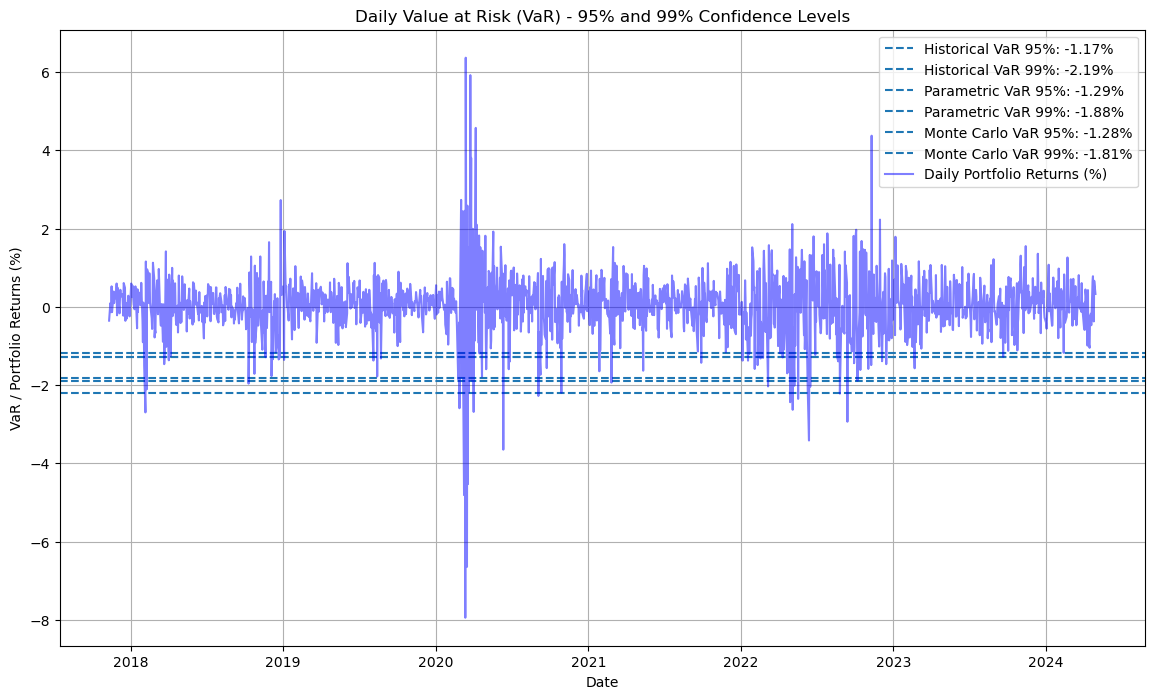

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Collection
assets = ['BTC-USD', 'ETH-USD', '^GSPC', 'AGG']  # Cryptos, S&P 500, Bonds
data = yf.download(assets, start='2015-09-01', end='2024-04-30')['Adj Close']

# Step 2: Align Trading Days
data = data.dropna()  # Drop rows with missing values to align trading days

# Step 3: Calculate Returns
returns = data.pct_change().dropna()

# Step 4: Portfolio Weights
# Define weights for traditional portfolio with crypto inclusion
trad_weights = {
    'Stock': 0.588,  # 60% stock reduced by 2% BTC-ETH allocation
    'Bond': 0.392,   # 40% bond reduced by 2% BTC-ETH allocation
    'BTC': 0.012,    # 2% allocation split: 60% BTC
    'ETH': 0.008     # 2% allocation split: 40% ETH
}

# Step 5: Calculate Portfolio Returns
weights = np.array([
    trad_weights['Stock'], 
    trad_weights['Bond'], 
    trad_weights['BTC'], 
    trad_weights['ETH']
])
portfolio_returns = returns[['^GSPC', 'AGG', 'BTC-USD', 'ETH-USD']].dot(weights)

# Step 6: Calculate VaR (Historical, Parametric, Monte Carlo)
confidence_levels = [0.95, 0.99]

# Historical VaR
var_results = {'Historical': {cl: np.percentile(portfolio_returns, (1 - cl) * 100) for cl in confidence_levels}}

# Parametric VaR (Assuming Normal Distribution)
portfolio_mean = portfolio_returns.mean()
portfolio_std = portfolio_returns.std()
var_results['Parametric'] = {cl: portfolio_mean + portfolio_std * np.percentile(np.random.randn(10000), (1 - cl) * 100) for cl in confidence_levels}

# Monte Carlo VaR
simulated_returns = np.random.normal(portfolio_mean, portfolio_std, 10000)
var_results['Monte Carlo'] = {cl: np.percentile(simulated_returns, (1 - cl) * 100) for cl in confidence_levels}

# Step 7: Print VaR Results
print("\nPortfolio Daily VaR (as percentage):")
for method, vars in var_results.items():
    for cl, var_value in vars.items():
        print(f"{method} VaR at {int(cl * 100)}%: {var_value * 100:.2f}%")

# Step 8: Plot VaR Results
plt.figure(figsize=(14, 8))
for method, vars in var_results.items():
    for cl, var_value in vars.items():
        plt.axhline(y=var_value * 100, linestyle='--', label=f'{method} VaR {int(cl * 100)}%: {var_value * 100:.2f}%')

plt.plot(portfolio_returns * 100, color='blue', alpha=0.5, label='Daily Portfolio Returns (%)')
plt.title("Daily Value at Risk (VaR) - 95% and 99% Confidence Levels")
plt.xlabel("Date")
plt.ylabel("VaR / Portfolio Returns (%)")
plt.legend()
plt.grid()
plt.show()
